In [63]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [64]:

# Function to normalize features
def  featureNormalize(data):
    # Calculate the mean and standard deviation of each feature
    nm = data.mean(axis=0)
    st = np.std(data, axis=0)
    # Normalize the data by subtracting the mean and dividing by the standard deviation
    data= (data- nm) / st
    return data,nm,st

In [65]:

# Function to compute the covariance matrix
def  covariance(data):
    m=data.shape[0]
    sigma=1/m*((data.T).dot(data))
    return sigma

In [66]:

# Function to calculate the variance retention for a given number of principal components
def varience_retention(k,S):
    retention=(np.sum(S[:k])/np.sum(S))
    return retention

In [67]:

# Principal Component Analysis (PCA) function
def pcm(data_raw):
    # Normalize the data and get mean and standard deviation
    data_norm,nm,st=featureNormalize(data_raw)
     # Compute the covariance matrix
    sigma=covariance(data_norm)
    # Perform Singular Value Decomposition (SVD)
    U, S, V = np.linalg.svd(sigma)
    return U,S,nm,st,data_norm

In [68]:

# Function to project data onto principal components
def  projectData(eigen,data):
    projected_Result=data.dot(eigen)
    return projected_Result

In [69]:

# Function to recover data from reduced dimensions
def recoverData(reduceddata,eigen):
    rec_dat=reduceddata.dot(eigen.T)
    return rec_dat

In [70]:

# Load the data from a .mat file (Make sure 'ex7data1.mat' exists in the current directory)
data= scipy.io.loadmat('ex7data1.mat')

In [71]:

X_example=data['X']


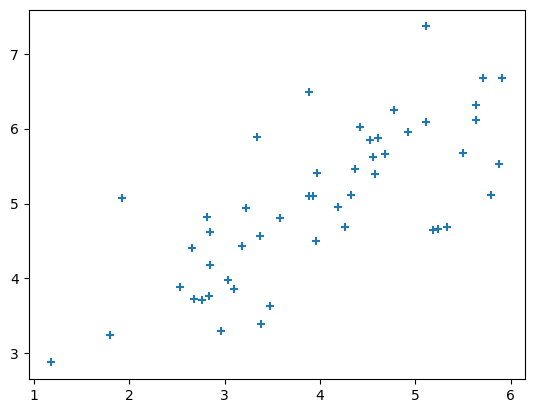

In [72]:

# Plot the original data points
plt.scatter(X_example[:,0],X_example[:,1],marker="+")

In [73]:

# Perform PCA and get principal components
U,S,nm,st,data=pcm(X_example)

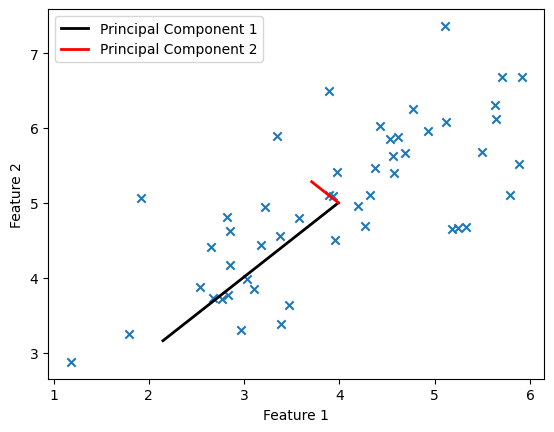

In [74]:


# Plot the first principal component
plt.plot([nm[0], nm[0] + 1.5* S[0] * U[0, 0]], [nm[1], nm[1] + 1.5 * S[0] * U[1, 0]], '-k', linewidth=2, label='Principal Component 1')

# Plot the second principal component
plt.plot([nm[0], nm[0] + 1.5* S[1] * U[0, 1]], [nm[1], nm[1] + 1.5 * S[1] * U[1, 1]], '-r', linewidth=2, label='Principal Component 2')
plt.scatter(X_example[:,0],X_example[:,1],marker="x")

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.show()


In [75]:

# Project data onto the first principal component
prog_dat=projectData(U[:,0],data).reshape(-1,1)

In [76]:

# Recover the data back to the original space
reconstruted_data=recoverData(prog_dat,U[:,0].reshape(-1,1))

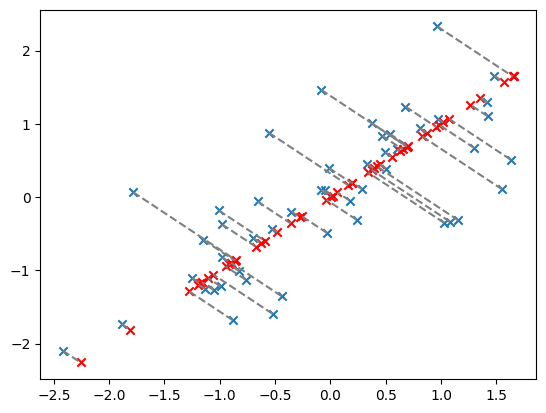

In [77]:

# Scatter the original data points
plt.scatter(data[:,0],data[:,1],marker="x")
# Scatter the reconstructed data points in red
plt.scatter(reconstruted_data[:,0],reconstruted_data[:,1],c="red",marker="x")
# Draw dashed lines to connect original and reconstructed points
for i in range(len(data)):
    plt.plot([data[i, 0], reconstruted_data[i, 0]], [data[i, 1], reconstruted_data[i, 1]], '--', color='gray')